In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# 1. Load real tabular data: Wine dataset (13 features)
wine = load_wine()
X = wine.data          # shape (n_samples, 13)
y = wine.target        # 3 classes of wine
feature_names = wine.feature_names
n_samples, n_features = X.shape
print(f"Wine data shape: {X.shape}")   # (178, 13)




Wine data shape: (178, 13)


In [5]:
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Explained variance ratio (first 5 components):
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]


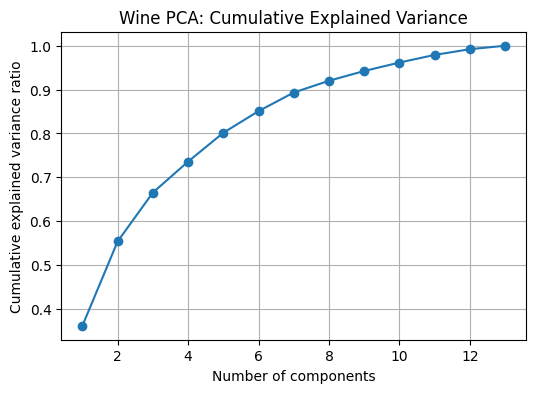

In [6]:
# 2. Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fit PCA with all components
pca_full = PCA(n_components=n_features)
X_scores = pca_full.fit_transform(X_scaled)        # Z = X W
X_recon_scaled = pca_full.inverse_transform(X_scores)
X_recon_full = scaler.inverse_transform(X_recon_scaled)

print("Explained variance ratio (first 5 components):")
print(pca_full.explained_variance_ratio_[:5])

# 4. Cumulative explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(6, 4))
plt.plot(range(1, n_features + 1), cumulative_explained_variance, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("Wine PCA: Cumulative Explained Variance")
plt.grid(True)
plt.show()


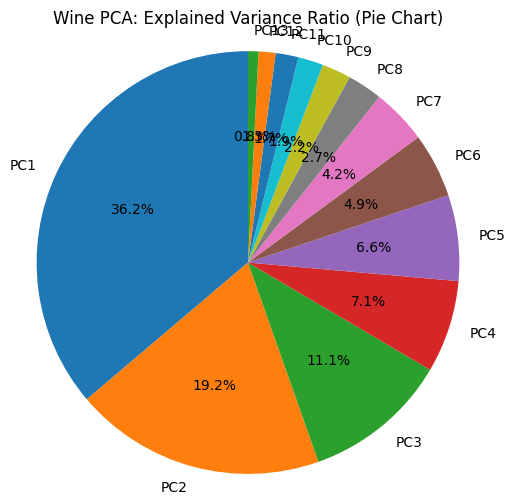

In [10]:
top_k = 13
ratios_top = explained_variance_ratio[:top_k]
ratios_rest = explained_variance_ratio[top_k:].sum()

labels = [f"PC{i+1}" for i in range(top_k)]
sizes = list(ratios_top)

# Group all remaining components into "Others"
if ratios_rest > 0:
    labels.append("Others")
    sizes.append(ratios_rest)

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",   # show percentages
    startangle=90        # rotate so first slice starts at the top
)
plt.title("Wine PCA: Explained Variance Ratio (Pie Chart)")
plt.axis("equal")        # make it a perfect circle
plt.show()

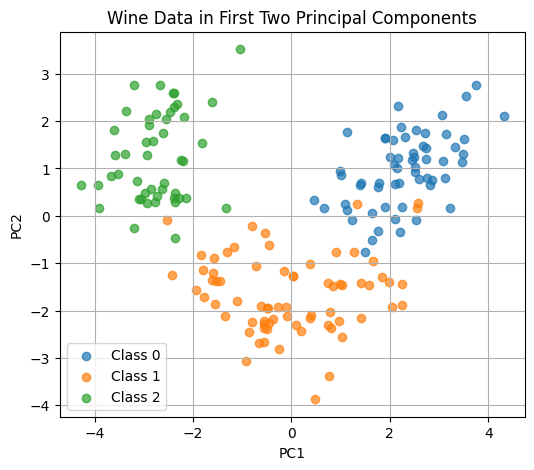

In [8]:

pca_2 = PCA(n_components=2)
Z_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
for label, color in zip(np.unique(y), ["tab:blue", "tab:orange", "tab:green"]):
    plt.scatter(
        Z_2[y == label, 0],
        Z_2[y == label, 1],
        label=f"Class {label}",
        alpha=0.7,
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine Data in First Two Principal Components")
plt.legend()
plt.grid(True)
plt.show()